# **Ch 0. 초기 설정 및 라이브러리 불러오기**

In [1]:
# 구글 드라이브로부터 데이터 불러오기
from google.colab import drive
drive.mount('/content/gdrive')

# 변수 저장/불러오기
import pickle

# 학습/평가 데이터 분할
from sklearn.model_selection import train_test_split

# 학습 결과 평가
from sklearn.metrics import mean_squared_error, r2_score

# 시각화
import matplotlib.pyplot as plt

# SVR library 불러오기
from sklearn.svm import SVR

# RFR library 불러오기
from sklearn.ensemble import RandomForestRegressor

# Tensorflow 불러오기
import tensorflow as tf


Mounted at /content/gdrive


In [2]:
%cd /..
%cd content/gdrive/MyDrive/hanon_1st

# Additional command for the diriectory
# !pwd : 현재 directory 확인
# !ls  : 현재 directory 에서의 파일들 확인

# 변수 불러오기
with open("Heat_Exchanger_pp_adv.pkl", "rb") as file:
    X_scaled, Y_scaled, scaler_X, scaler_Y = pickle.load(file)

# 데이터를 학습용과 테스트용으로 분리
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)

/
/content/gdrive/MyDrive/hanon_1st


# **Ch 1. Support Vector Regression (SVR)**

## Ch 1-1. 모델 생성 및 학습


In [3]:
# SVR 학습
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
svm_model = SVR(kernel='linear')
# svm_model = SVR(kernel='rbf')
svm_model.fit(X_scaled_train, Y_scaled_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

## Ch 1-2. 모델 평가

MSE_train: 0.3296823349429153
R-squared_train: 0.6646945360535446
MSE_test: 0.2657736311853674
R-squared_test: 0.7432436303983774


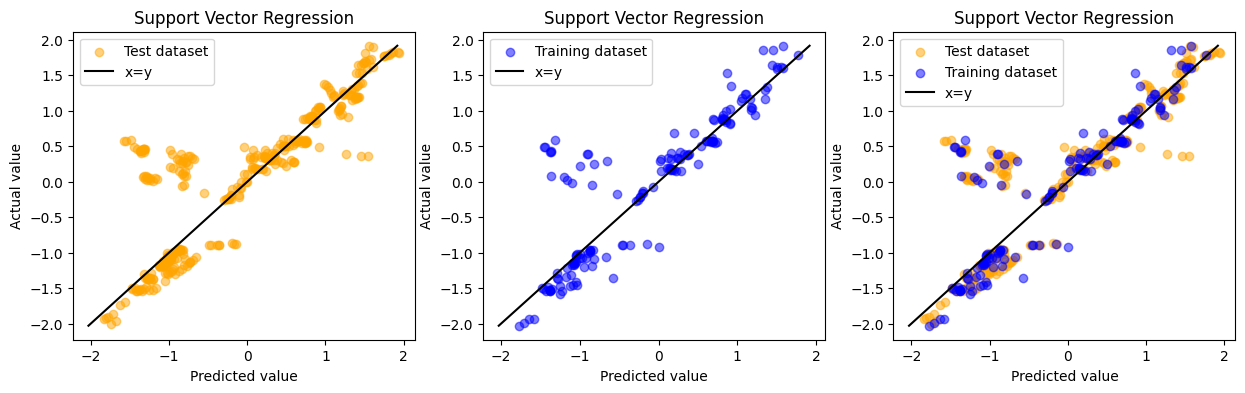

In [4]:
# 학습된 SVR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = svm_model.predict(X_scaled_train)
Y_scaled_test_pred = svm_model.predict(X_scaled_test)

# SVR 학습 성능 평가
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Support Vector Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

# **Ch 2. Random Forest Regression (RFR)**


## Ch 2-1. 모델 생성 및 학습

In [5]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
rfr_model = RandomForestRegressor(n_estimators=5)
# rfr_model = RandomForestRegressor(n_estimators=20)
# rfr_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)[source]
rfr_model.fit(X_scaled_train, Y_scaled_train)

<ipython-input-5-a976beae8ed2>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_model.fit(X_scaled_train, Y_scaled_train)


RandomForestRegressor(n_estimators=5)

## Ch 2-2. 모델 평가

MSE_train: 0.034260912827804635
R-squared_train: 0.9651547260700357
MSE_test: 0.1500171918303782
R-squared_test: 0.8550726444139476


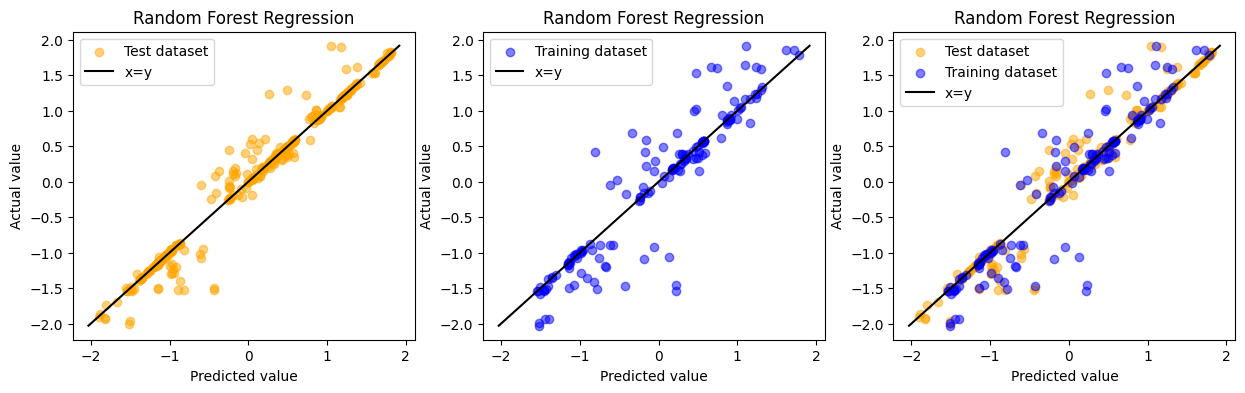

In [6]:
# 학습된 RFR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = rfr_model.predict(X_scaled_train)
Y_scaled_test_pred = rfr_model.predict(X_scaled_test)

# RFR 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# RFR 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Random Forest Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Random Forest Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Random Forest Regression")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

# **Ch 3. Deep Neural Network (DNN)**


## Ch 3-1. 모델 생성 및 학습

In [7]:
dnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_scaled_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
dnn_model.compile(loss='mean_squared_error', optimizer='adam')

hist=dnn_model.fit(X_scaled_train, Y_scaled_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
12/12 [==============================] - 6s 4ms/step - loss: 0.9370
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 0.7572
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 0.5838
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 0.4553
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 0.3481
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2805
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 0.2367
Epoch 8/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1897
Epoch 9/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1682
Epoch 10/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1526
Epoch 11/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1358
Epoch 12/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1285
Epoch 13/50
12/12 [==============================

## Ch 3-2. 모델 평가

5/5 [==============================] - 0s 4ms/step
MSE_train: 0.05835306574733505
R-squared_train: 0.9406516524869429
MSE_test: 0.07788896954739234
R-squared_test: 0.9247536749082095


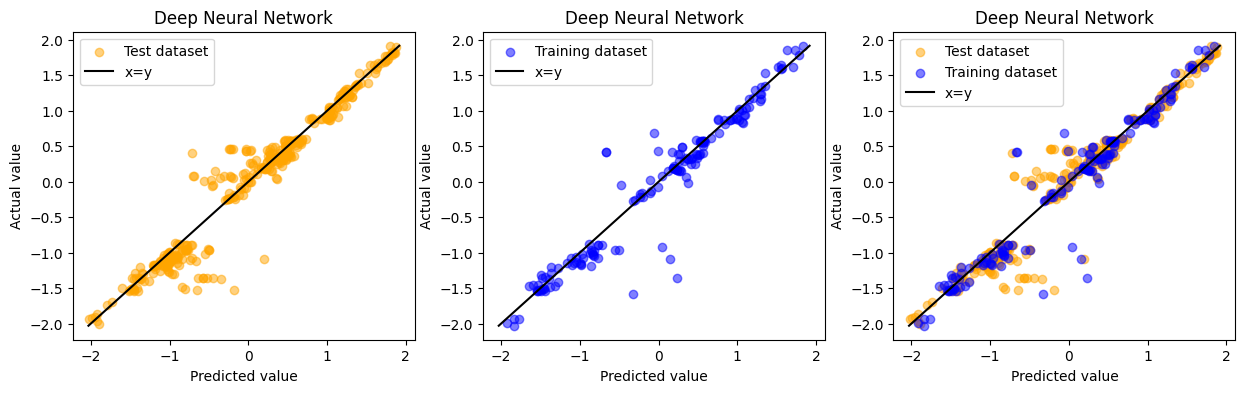

In [8]:
# 학습된 DNN을 활용하여 테스트 셋 예측
Y_scaled_train_pred = dnn_model.predict(X_scaled_train)
Y_scaled_test_pred = dnn_model.predict(X_scaled_test)

# DNN 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# DNN 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Deep Neural Network")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Deep Neural Network")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("Deep Neural Network")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

# **Ch 4. Hyperprameter tuning; Grid Search**


## Grid Search

![Slide15](https://github.com/woooky/jinwook/assets/84065529/1231ef98-1c87-4889-b7ce-9d385db3ade0)

## Cross validation

![Slide16](https://github.com/woooky/jinwook/assets/84065529/44bfeac5-8daf-4907-abe4-fb4322c9af0c)

![Slide17](https://github.com/woooky/jinwook/assets/84065529/360dfbdc-e73b-461a-871f-f867cd9d9aff)

# **Ch 5. Random Forest Regression (RFR) with Grid Search**


## RFR with Grid Search

In [9]:
# Grid search 함수 불러오기
from sklearn.model_selection import GridSearchCV

In [10]:
# 변수 불러오기
with open("Heat_Exchanger_pp_adv.pkl", "rb") as file:
    X_scaled, Y_scaled, scaler_X, scaler_Y = pickle.load(file)

In [11]:
rfr_model = RandomForestRegressor()
# rfr_model = RandomForestRegressor(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)[source]
params_= {
    'n_estimators': [5, 25, 125],          # 결정 트리 개수
    'max_depth': [None, 10, 20, 30],           # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],           # 노드를 분할하기 위한 최소 샘플 개수
#    'min_samples_leaf': [1, 2, 4]              # 리프 노드가 되기 위한 최소 샘플 개수
}

grid_cv = GridSearchCV(estimator=rfr_model, param_grid=params_, scoring='neg_mean_squared_error', cv=5, verbose=2)

grid_cv_result=grid_cv.fit(X_scaled, Y_scaled.ravel())

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=25; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=125; total time=   0.6s
[CV] END max_depth=None, min_samples_spl

In [12]:
print("Best Hyperparameters:", grid_cv_result.best_params_)
print("Best mean_squared_error:", -grid_cv_result.best_score_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 25}
Best mean_squared_error: 1.031943358494468


## 최적화된 하이퍼 파라미터 사용하기

In [13]:
# 변수 불러오기
with open("Heat_Exchanger_pp_adv.pkl", "rb") as file:
    X_scaled, Y_scaled, scaler_X, scaler_Y = pickle.load(file)

# 데이터를 학습용과 테스트용으로 분리
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)

rfr_model_opt = RandomForestRegressor(max_depth= None, min_samples_leaf= 2, min_samples_split=2, n_estimators= 25)

rfr_model_opt.fit(X_scaled_train, Y_scaled_train.ravel())

RandomForestRegressor(min_samples_leaf=2, n_estimators=25)

MSE_train: 0.021283622626745137
R-squared_train: 0.9783533595739737
MSE_test: 0.11765440855380326
R-squared_test: 0.8863374117546248


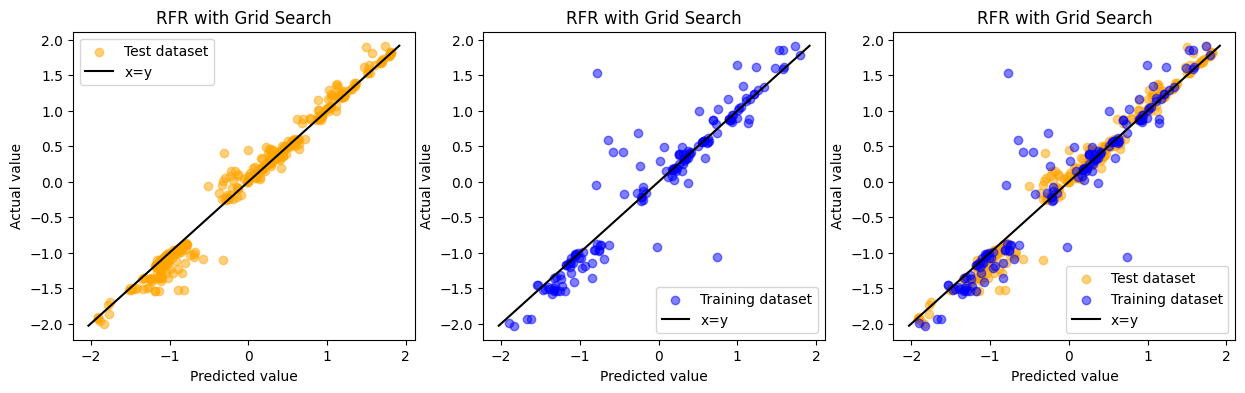

In [14]:
# 학습된 RFR을 활용하여 테스트 셋 예측
Y_scaled_train_pred = rfr_model_opt.predict(X_scaled_train)
Y_scaled_test_pred = rfr_model_opt.predict(X_scaled_test)

# RFR 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# RFR 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("RFR with Grid Search")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("RFR with Grid Search")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("RFR with Grid Search")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()

# **Ch 6. Deep Neural Network (DNN) with Grid Search**


In [15]:
# 변수 불러오기
with open("Heat_Exchanger_pp_adv.pkl", "rb") as file:
    X_scaled, Y_scaled, scaler_X, scaler_Y = pickle.load(file)

In [16]:
def create_dnn_model( hidden_units=64, layer_depth=1, ):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(hidden_units, input_dim=X_scaled.shape[1], activation='relu'))

    for _ in range(layer_depth - 1):
        model.add(tf.keras.layers.Dense(hidden_units, activation='relu'))

    model.add(tf.keras.layers.Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

dnn_model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_dnn_model, verbose=1)

<ipython-input-16-a98318a3b880>:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  dnn_model = tf.keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_dnn_model, verbose=1)


In [17]:
param_grid = {
    'hidden_units': [32, 64, 128],
    'layer_depth': [2,4,8]
}
grid_cv = GridSearchCV(estimator=dnn_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_cv_result = grid_cv.fit(X_scaled, Y_scaled.ravel(), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
14/14 [==============================] - 1s 3ms/step - loss: 1.0381
Epoch 2/50
14/14 [==============================] - 0s 3ms/step - loss: 0.8669
Epoch 3/50
14/14 [==============================] - 0s 3ms/step - loss: 0.7576
Epoch 4/50
14/14 [==============================] - 0s 3ms/step - loss: 0.6724
Epoch 5/50
14/14 [==============================] - 0s 3ms/step - loss: 0.6073
Epoch 6/50
14/14 [==============================] - 0s 3ms/step - loss: 0.5510
Epoch 7/50
14/14 [==============================] - 0s 3ms/step - loss: 0.4934
Epoch 8/50
14/14 [==============================] - 0s 3ms/step - loss: 0.4504
Epoch 9/50
14/14 [==============================] - 0s 3ms/step - loss: 0.4028
Epoch 10/50
14/14 [==============================] - 0s 3ms/step - loss: 0.3677
Epoch 11/50
14/14 [==============================] - 0s 3ms/step - loss: 0.3315
Epoch 12/50
14/14 [==============================] - 0s 3ms/step - loss: 0.3030
Epoch 13/50
14/14 [==============================

In [18]:
print("Best Hyperparameters:", grid_cv_result.best_params_)
print("Best mean_squared_error:", -grid_cv_result.best_score_)

Best Hyperparameters: {'hidden_units': 128, 'layer_depth': 2}
Best mean_squared_error: 0.5226486608362124


In [19]:
# 최적의 하이퍼파라미터 사용
X_scaled_train, X_scaled_test, Y_scaled_train, Y_scaled_test = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)

dnn_model_opt=create_dnn_model( hidden_units=32, layer_depth=4,)

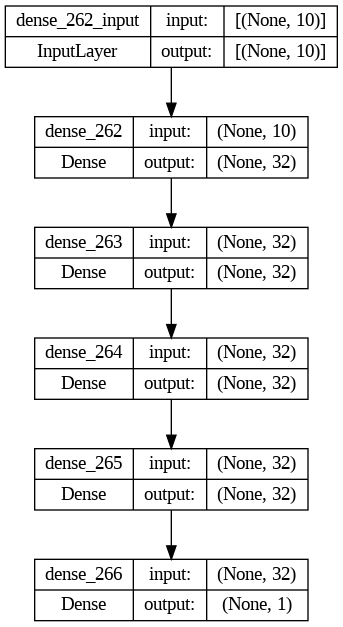

In [20]:
# DNN 아키텍쳐 시각화
tf.keras.utils.plot_model(dnn_model_opt, to_file='dnn_architecture_w_GS.png', show_shapes=True, show_layer_names=True)

In [21]:
dnn_model_opt.fit(X_scaled_train, Y_scaled_train.ravel(), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
12/12 [==============================] - 3s 5ms/step - loss: 0.9565
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.8719
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.7697
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 0.6289
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.4890
Epoch 6/50
12/12 [==============================] - 0s 4ms/step - loss: 0.3740
Epoch 7/50
12/12 [==============================] - 0s 4ms/step - loss: 0.3044
Epoch 8/50
12/12 [==============================] - 0s 5ms/step - loss: 0.2591
Epoch 9/50
12/12 [==============================] - 0s 4ms/step - loss: 0.2265
Epoch 10/50
12/12 [==============================] - 0s 6ms/step - loss: 0.2050
Epoch 11/50
12/12 [==============================] - 0s 4ms/step - loss: 0.1849
Epoch 12/50
12/12 [==============================] - 0s 3ms/step - loss: 0.1691
Epoch 13/50
12/12 [==============================

5/5 [==============================] - 0s 2ms/step
MSE_train: 0.06343224962720008
R-squared_train: 0.9354858370130796
MSE_test: 0.08886789985117093
R-squared_test: 0.9141472416276206


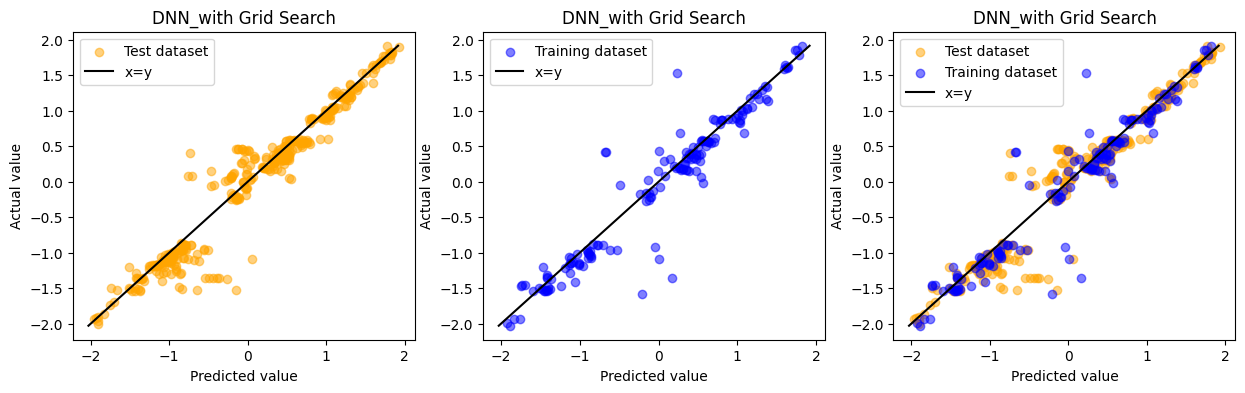

In [22]:
# 학습된 DNN을 활용하여 테스트 셋 예측
Y_scaled_train_pred = dnn_model_opt.predict(X_scaled_train)
Y_scaled_test_pred = dnn_model_opt.predict(X_scaled_test)

# DNN 학습 성능 평가 for train
mse_train = mean_squared_error(Y_scaled_train, Y_scaled_train_pred)
print("MSE_train:", mse_train)
r2_train = r2_score(Y_scaled_train, Y_scaled_train_pred)
print("R-squared_train:", r2_train)

# DNN 학습 성능 평가 for test
mse_test = mean_squared_error(Y_scaled_test, Y_scaled_test_pred)
print("MSE_test:", mse_test)
r2_test = r2_score(Y_scaled_test, Y_scaled_test_pred)
print("R-squared_test:", r2_test)

# 예측 값과 실제 값 비교를 위한 데이터 준비
plt.figure(figsize=(15, 4))  # 그래프 크기 설정

# 실제 값과 예측 값 비교를 위한 plot for test dataset
plt.subplot(1,3,1)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("DNN_with Grid Search")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,2)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("DNN_with Grid Search")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Training dataset','x=y'])

# 실제 값과 예측 값 비교를 위한 plot for training dataset
plt.subplot(1,3,3)
plt.scatter(Y_scaled_train_pred, Y_scaled_train, c='orange', alpha=0.5)
plt.scatter(Y_scaled_test_pred, Y_scaled_test, c='blue', alpha=0.5)
# x=y 그리기
min_val = min(min(Y_scaled_test_pred), min(Y_scaled_test))
max_val = max(max(Y_scaled_test_pred), max(Y_scaled_test))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')
# plot
plt.title("DNN_with Grid Search")
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.legend(['Test dataset','Training dataset','x=y'])

plt.show()